<a href="https://colab.research.google.com/github/koh415/W5HW_CSC481/blob/main/W5HW_CSC_481_Levine_Sidney.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('gila_river.csv')

In [ ]:
data.head()

,y(t-1),y(t-2),y(t-3),y(t)
0,0.0,0.0,0.0,32.0
1,32.0,0.0,0.0,27.0
2,27.0,32.0,0.0,27.0
3,27.0,27.0,32.0,25.0
4,25.0,27.0,27.0,27.0


In [ ]:
data.shape

(1034, 4)

In [ ]:
X = data.drop(columns=['y(t)'])
Y = data['y(t)']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
mlp = MLPRegressor(hidden_layer_sizes=(64, 64), max_iter=3000)

In [ ]:
mlp.fit(X_train, Y_train)

MLPRegressor(hidden_layer_sizes=(64, 64), max_iter=3000)

In [ ]:
y_train_pred = mlp.predict(X_train)
y_test_pred = mlp.predict(X_test)

In [ ]:
msr_train = mean_squared_error(Y_train, y_train_pred)
msr_test = mean_squared_error(Y_test, y_test_pred)

In [ ]:
print(f"Training MSE: {msr_train}")
print(f"Testing MSE: {msr_test}")

Training MSE: 58291.22343992478
Testing MSE: 23903.321836842755


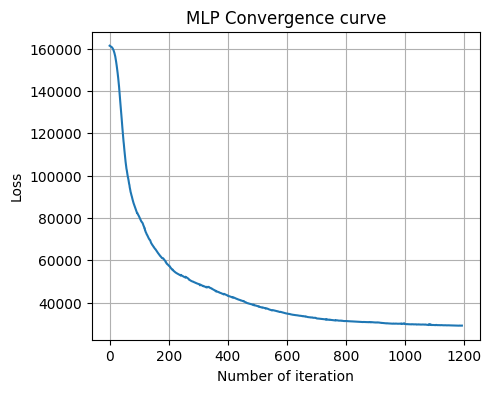

In [ ]:
plt.figure(figsize=(5, 4))
plt.plot(mlp.loss_curve_)
plt.title("MLP Convergence curve")
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

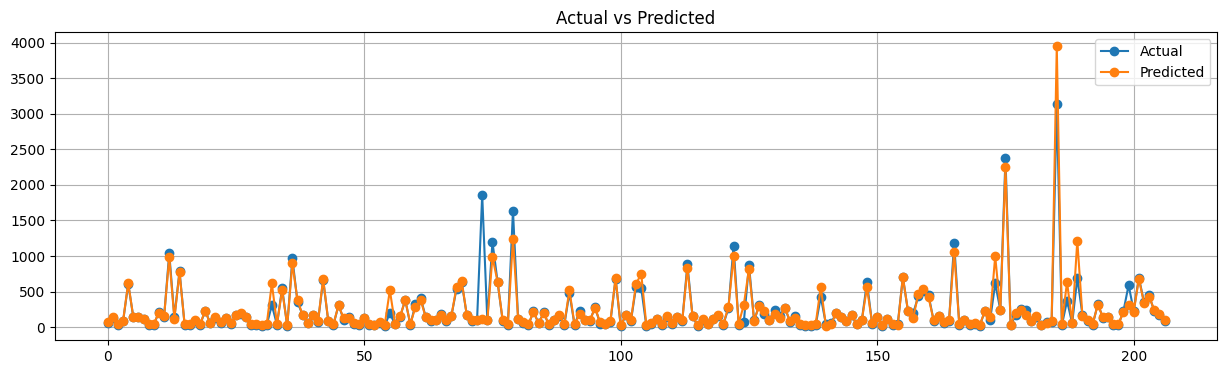

In [ ]:
t = range(len(Y_test))

plt.figure(figsize=(15, 4))
plt.plot(t, Y_test, label='Actual', linestyle='-', marker='o')
plt.plot(t, y_test_pred, label='Predicted', linestyle='-', marker='o')
plt.title('Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.show()

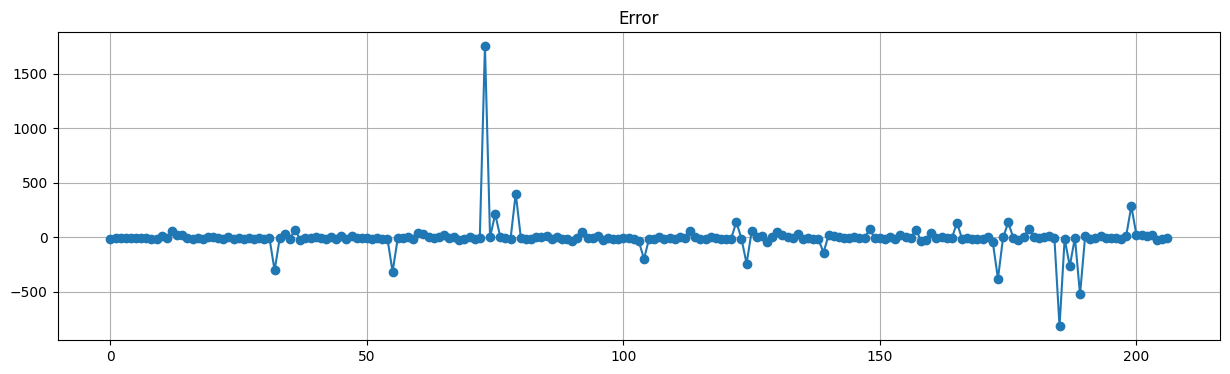

In [ ]:
t = range(len(Y_test))

plt.figure(figsize=(15, 4))
plt.plot(t, Y_test - y_test_pred, label='Actual', linestyle='-', marker='o')
plt.title('Error')
plt.grid(True)
plt.show()

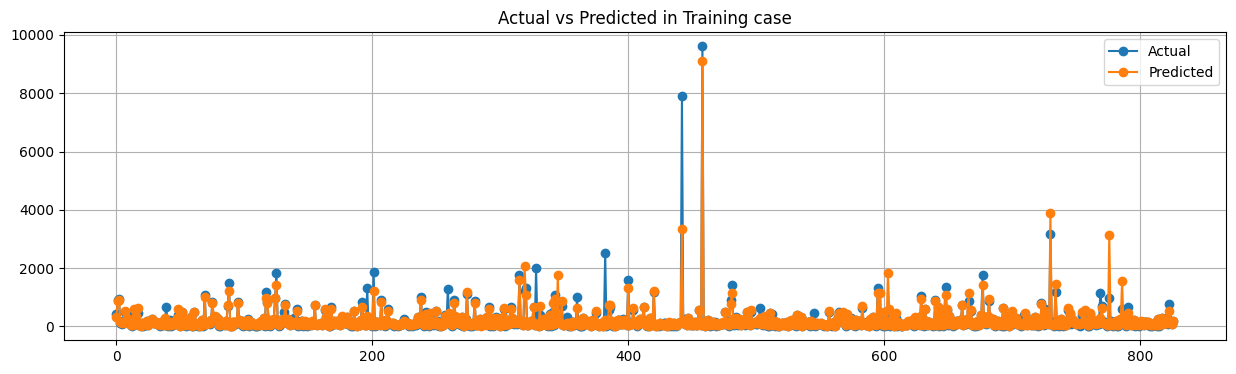

In [ ]:
t = range(len(Y_train))

plt.figure(figsize=(15, 4))
plt.plot(t, Y_train, label='Actual', linestyle='-', marker='o')
plt.plot(t, y_train_pred, label='Predicted', linestyle='-', marker='o')
plt.title('Actual vs Predicted in Training case')
plt.legend()
plt.grid(True)
plt.show()